In [0]:
from google.colab import files

In [0]:
upload = files.upload()

Saving fashion-mnist_train.csv to fashion-mnist_train (2).csv


In [0]:
upload2 = files.upload()

Saving fashion-mnist_test.csv to fashion-mnist_test.csv


In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb

In [0]:
trainingDataset = pd.read_csv('fashion-mnist_train (2).csv',sep=",")

In [0]:
trainingDataset.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [0]:
testDataset = pd.read_csv('fashion-mnist_test.csv',sep=",")

In [0]:
testDataset.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [0]:
training = np.array(trainingDataset,dtype="float32")

Text(0.5, 1.0, '1.0')

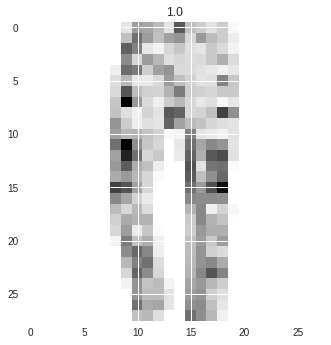

In [0]:
plt.imshow(training[5922,1:].reshape(28,28))
plt.title(training[5922,0])

In [0]:
training.shape

(60000, 785)

In [0]:
testing = np.array(testDataset,dtype="float32")

In [0]:
testing.shape

(10000, 785)

Text(0.5, 1.0, '2.0')

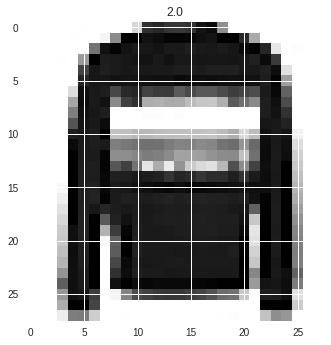

In [0]:
import random
row = random.randint(1,len(training)-1)
plt.imshow(training[row,1:].reshape(28,28))
plt.title(training[row,0])

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


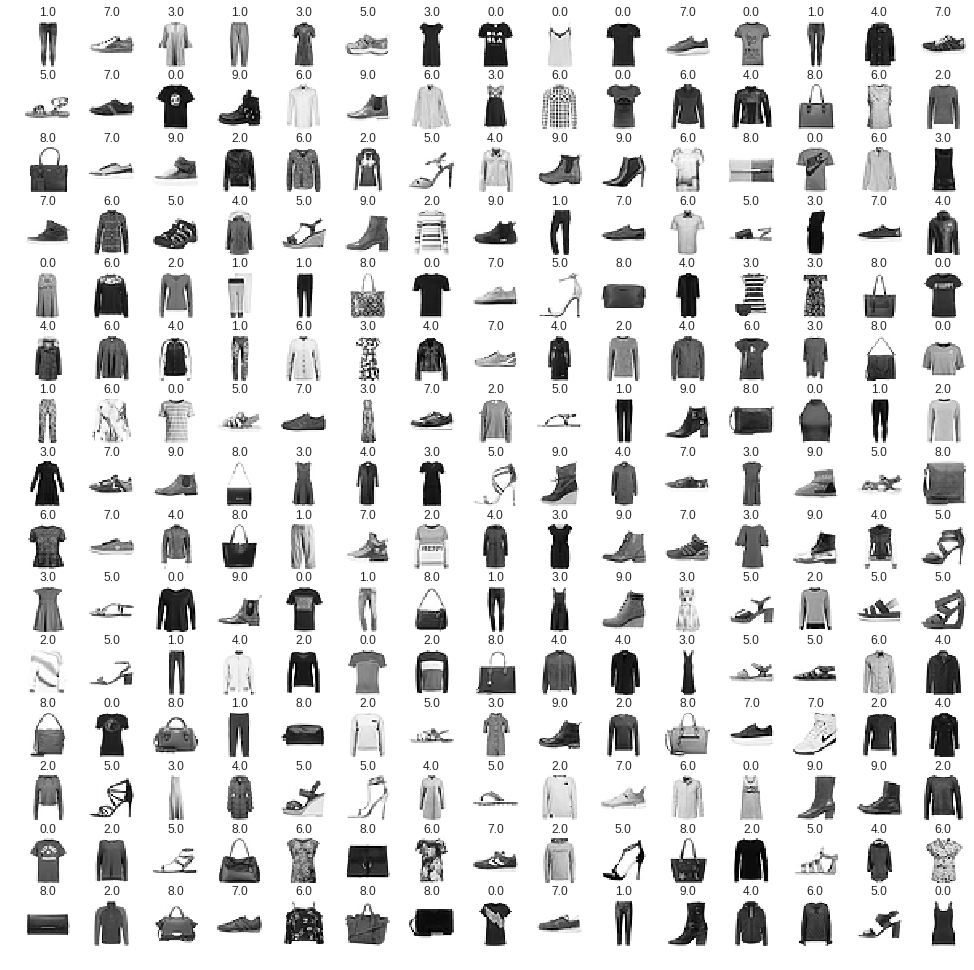

In [0]:
w_grid = 15
l_grid = 15

fig,axes = plt.subplots(l_grid,w_grid,figsize=(17,17))

axes = axes.ravel()

n_training = len(training)

for i in range(0,l_grid*w_grid):
  row = random.randint(0,n_training-1)
  axes[i].imshow(training[row,1:].reshape(28,28))
  axes[i].grid("False")
  axes[i].axis("off")
  axes[i].set_title(training[row,0])
  
plt.subplots_adjust(hspace=0.4)

In [0]:
X_train = training[:,1:]/255
y_train = training[:,0]

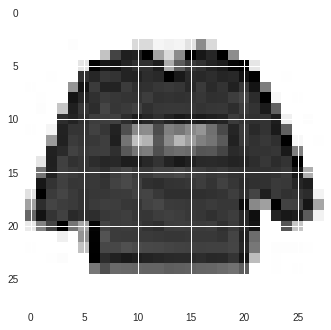

In [0]:
plt.imshow(X_train[0].reshape(28,28))

In [0]:
X_test = testing[:,1:]/255
y_test = testing[:,0]

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size=0.2,random_state=121)

In [0]:
X_train.shape

(48000, 784)

In [0]:
X_train = X_train.reshape(X_train.shape[0],28,28,1)

In [0]:
X_train.shape

(48000, 28, 28, 1)

In [0]:
X_test = X_test.reshape(X_test.shape[0],28,28,1)

In [0]:
X_val = X_val.reshape(X_val.shape[0],28,28,1)

# Importing Keras Libraries

In [0]:
from keras.layers import Conv2D,MaxPooling2D,Dense,Dropout,Flatten
from keras.models import Sequential
from keras.optimizers import Adam

In [0]:
def model():
  lenet = Sequential()
  lenet.add(Conv2D(64,3,3,input_shape=(28,28,1),activation="relu"))
  lenet.add(MaxPooling2D(pool_size=(2,2)))
  lenet.add(Dropout(0.5))
  lenet.add(Flatten())
  lenet.add(Dense(32,activation="relu"))
  lenet.add(Dense(10,activation="sigmoid"))
  lenet.compile(loss="sparse_categorical_crossentropy",optimizer=Adam(lr=0.01),metrics=['accuracy'])
  return lenet

In [0]:
lenet = model()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), input_shape=(28, 28, 1..., activation="relu")`
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
lenet.fit(X_train,y_train,batch_size=500,epochs=50,verbose=1,validation_data=(X_val,y_val))

Instructions for updating:
Use tf.cast instead.
Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 7s 149us/step - loss: 0.5919 - acc: 0.7884 - val_loss: 0.3579 - val_acc: 0.8773
Epoch 2/50
48000/48000 [==============================] - 2s 51us/step - loss: 0.3497 - acc: 0.8754 - val_loss: 0.3140 - val_acc: 0.8920
Epoch 3/50
48000/48000 [==============================] - 2s 51us/step - loss: 0.3138 - acc: 0.8874 - val_loss: 0.3072 - val_acc: 0.8928
Epoch 4/50
48000/48000 [==============================] - 2s 51us/step - loss: 0.2947 - acc: 0.8933 - val_loss: 0.3016 - val_acc: 0.8948
Epoch 5/50
48000/48000 [==============================] - 2s 51us/step - loss: 0.2761 - acc: 0.8979 - val_loss: 0.2920 - val_acc: 0.8994
Epoch 6/50
48000/48000 [==============================] - 2s 51us/step - loss: 0.2593 - acc: 0.9038 - val_loss: 0.2848 - val_acc: 0.9028
Epoch 7/50
48000/48000 [==============================] - 2s 52us/step - loss: 

In [0]:
predition = lenet.predict_classes(X_test)

In [0]:
predition

array([0, 1, 2, ..., 8, 8, 1])

In [0]:
def getLabel(index):
  index = int(index)
  data = ["T-shirt/Top","Trousers","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankie Boot"]
  return data[index]

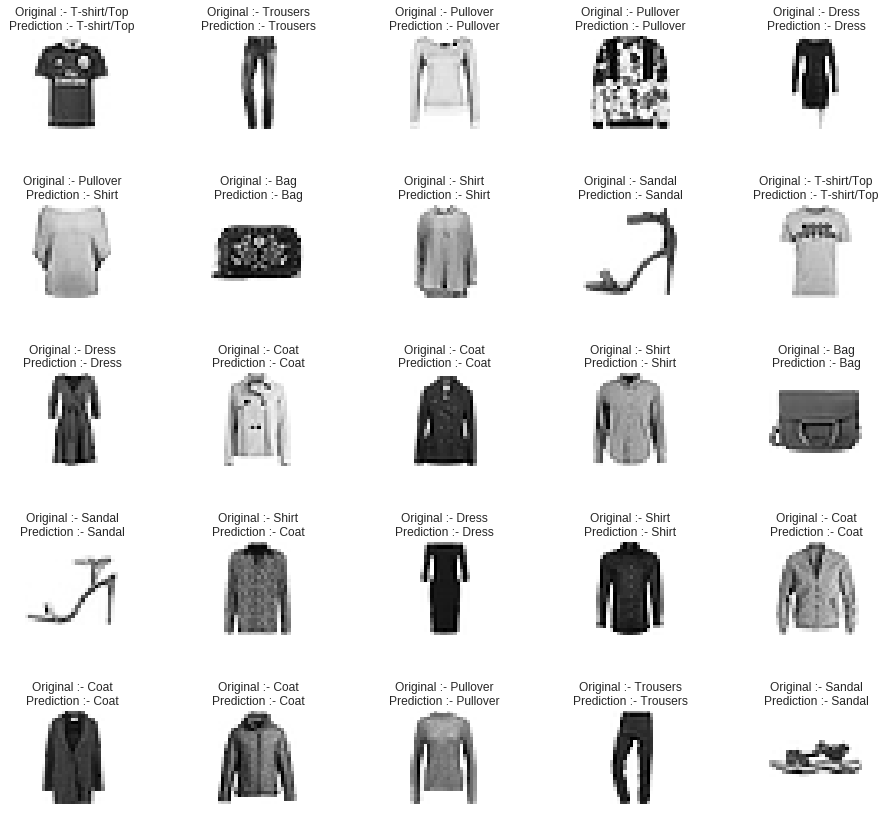

In [0]:
l = 5
w = 5

fig,axes = plt.subplots(l,w,figsize=(15,15))
axes = axes.ravel()
for i in range(0,l*w):
  axes[i].imshow(X_test[i].reshape(28,28))
  axes[i].set_title("Original :- {}\nPrediction :- {}".format(getLabel(y_test[i]),getLabel(predition[i])))
  axes[i].axis("off")
  
plt.subplots_adjust(wspace=1)

In [0]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,predition)

In [0]:
cm

array([[884,   1,  20,  23,   2,   1,  59,   0,  10,   0],
       [  1, 989,   3,   4,   0,   0,   2,   0,   1,   0],
       [ 24,   2, 853,  14,  53,   1,  53,   0,   0,   0],
       [  8,   9,   2, 946,  15,   0,  20,   0,   0,   0],
       [  3,   1,  51,  23, 867,   0,  55,   0,   0,   0],
       [  0,   1,   0,   0,   0, 974,   0,  20,   2,   3],
       [125,   3,  57,  32,  30,   0, 748,   0,   5,   0],
       [  0,   0,   0,   0,   0,   7,   0, 970,   0,  23],
       [  2,   2,   0,   3,   2,   3,   6,   2, 980,   0],
       [  0,   0,   0,   0,   1,   4,   0,  32,   0, 963]])

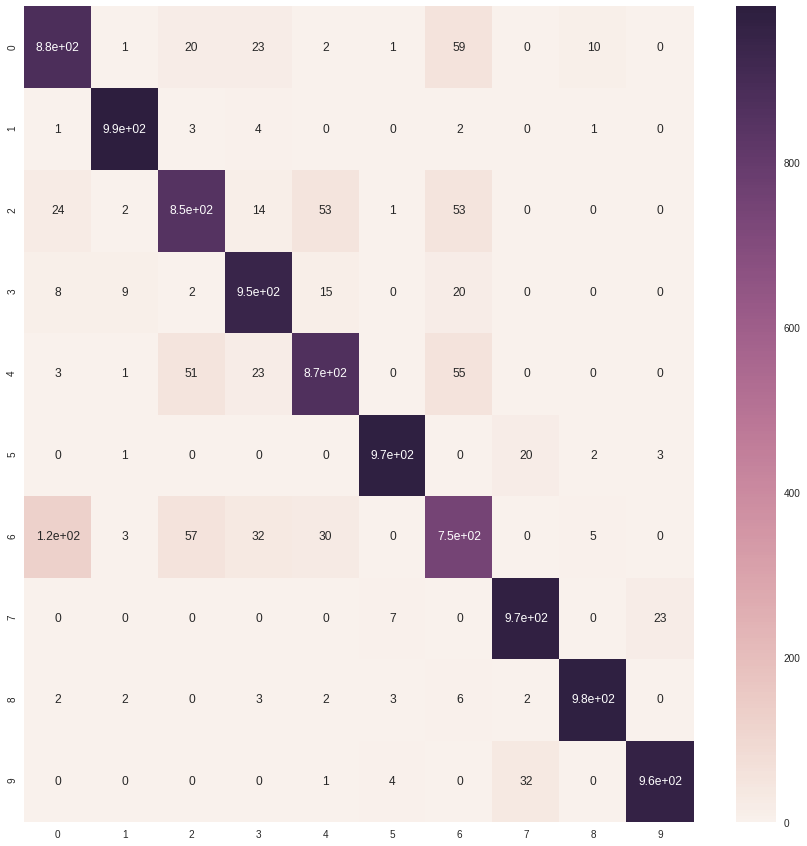

In [0]:
plt.figure(figsize=(15,15))
sb.heatmap(cm,annot=True)

In [0]:
from sklearn.metrics import classification_report

In [0]:
target_names = ["T-shirt/Top","Trousers","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankie Boot"]
print(classification_report(y_test,predition,target_names=target_names))

              precision    recall  f1-score   support

 T-shirt/Top       0.84      0.88      0.86      1000
    Trousers       0.98      0.99      0.99      1000
    Pullover       0.87      0.85      0.86      1000
       Dress       0.91      0.95      0.93      1000
        Coat       0.89      0.87      0.88      1000
      Sandal       0.98      0.97      0.98      1000
       Shirt       0.79      0.75      0.77      1000
     Sneaker       0.95      0.97      0.96      1000
         Bag       0.98      0.98      0.98      1000
  Ankie Boot       0.97      0.96      0.97      1000

   micro avg       0.92      0.92      0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000

